# IND5003 Enron Project
## Contents of this Jupyter Notebook
### Dataset
Dataset from Prof: 
(https://www.cs.cmu.edu/~./enron/)
- Unstructured Dataset containing raw text in the form of emails
**Make sure that the dataset 'maildir' is in the same directory as your project on your own system. Else this would not work**

## Approach to this Project

### Research Questions
(Use research questions to provide a narrative and storyline in our analysis of the Enron Email Corpus)

We would be taking a broad to narrow approach in terms of the narrative that we are looking to create. 

Some research questions that we would be hoping to analyse in this project are:
1. Are there any topical shifts that we can identify prior, leading up to and after the fraud has been exposed?
2. Can we detect sentiment shifts and anomalies in communication patterns leading up to, during and after the exposure of the fraud?
3. Identification of key individuals involved in the key discussions and anomalies in their comms patterns

#### Timeline

We have an intention to split our analysis into 3 defined timeframes:
1. Pre-Crisis (June 1999 - Aug 2001)
2. During Crisis (Sep 2000 - Oct 2001)
3. Post Crisis (Nov 2001 - June 2002)

These research questions would be answered using a variety of NLP and Unsupervised Learning Techniques. 

*** [GUYS WE NEED TO THINK OF THE TECHNIQUES] ***
1. t-sne for initial identification of clusters
2. LDA for topic identification
3. Named entity recognition for trends in any entity
4. Sentimental Analysis
5. Anomaly detection (HOW?) 
6. Information retrieval to identify relevant individuals

### Overall Steps to Tackle this Project
1. Data Extraction
2. Data Cleaning & Preprocessing
3. Initial Data Exploration
    - Sender Frequency Analysis
    - Number of Emails Across Time
    - General topic modeling
    - General sentiment analysis
    - Word Cloud & Bar Charts for the Top Senders (20%)
    - Network Graph
    - t-sne graph
4. Research Questions
    1. Temporal Topical shifts using LDA Topic Modeling
    2. Temporal Sentimental Analysis - Segment the emails by quarters. Look at the way communication changes over time.
    3. Anomaly detection using?
    4. Key individual detection using?

    

## Section 1: Data Extraction
- Extract the emails from the unstructured raw folder


In [3]:
# Import the relevant libraries required for Section 1
import os # Required for directory traversal
import pandas as pd
import email
from email import policy
from email.parser import BytesParser
from collections import defaultdict
from itertools import islice

# additional libraries added for possible usage
import numpy as np
import pprint
import nltk
import re
import gensim
from gensim.parsing.preprocessing import *
import gensim.downloader as api
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import manifold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt

from transformers import pipeline

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import plotly.express as px

In [126]:
# # Set the maildir path to the respective paths in your system 
# # ! Note that maildir should be in the same directory as your project on your own system, would change if you are using windows
# maildir_path = '/Users/Dylan/Documents/IND5003/Projects/maildir'

In [127]:
# # Create a list of all the directories in the maildir for sanity check
# maildir_list = os.listdir(maildir_path)
# print(maildir_list)

In [128]:
# def parse_email(file_path):
#     try:
#         with open(file_path, 'rb') as f:
#             msg = BytesParser(policy=policy.default).parse(f)
        
#         # Extract fields from the email
#         email_from = msg['From']
#         email_to = msg['To']
#         email_date = msg['Date']
#         email_subject = msg['Subject']
#         email_body = msg.get_body(preferencelist=('plain')).get_content() if msg.get_body(preferencelist=('plain')) else ''
        
#         return [email_from, email_to, email_date, email_subject, email_body]
#     except Exception as e:
#         print(f"Error parsing file {file_path}: {e}")
#         return None

# def batch_iterator(iterator, batch_size):
#     """Yield batches of specified size from an iterator."""
#     while True:
#         batch = list(islice(iterator, batch_size))
#         if not batch:
#             break
#         yield batch

# def load_emails(maildir_path, batch_size=10, max_emails=50):
#     email_data = []
#     file_paths = []

#     # Walk through the directory to collect file paths
#     for root, dirs, files in os.walk(maildir_path):
#         for file in files:
#             if file == '.DS_Store' or file.startswith('.'):
#                 continue  # Skip system files and hidden files
#             file_paths.append(os.path.join(root, file))
#             if len(file_paths) >= max_emails:
#                 break
#         if len(file_paths) >= max_emails:
#             break

#     # Process emails in batches
#     for batch in batch_iterator(iter(file_paths), batch_size):
#         batch_data = []
#         for file_path in batch:
#             result = parse_email(file_path)
#             if result is not None:
#                 batch_data.append(result)
        
#         # Append batch data to the main list
#         email_data.extend(batch_data)

#     # Create a DataFrame from the extracted data
#     df = pd.DataFrame(email_data, columns=['From', 'To', 'Date', 'Subject', 'Body'])
#     return df

# # Load and parse emails
# emails_df = load_emails(maildir_path, batch_size=10, max_emails=50)

# # Display the DataFrame
# print(emails_df.head())

In [129]:

# # ! This is a very large dataset and will take a long time to run
# # ! DO NOT RUN THIS FOR FUN UNLESS YOU WANT YOUR COMPUTER TO CRASH
# def parse_email(file_path):
#     try:
#         with open(file_path, 'rb') as f:
#             msg = BytesParser(policy=policy.default).parse(f)
        
#         # Extract fields from the email
#         email_from = msg['From']
#         email_to = msg['To']
#         email_date = msg['Date']
#         email_subject = msg['Subject']
#         email_body = msg.get_body(preferencelist=('plain')).get_content() if msg.get_body(preferencelist=('plain')) else ''
        
#         return [email_from, email_to, email_date, email_subject, email_body]
#     except Exception as e:
#         print(f"Error parsing file {file_path}: {e}")
#         return None

# def batch_iterator(iterator, batch_size):
#     """Yield batches of specified size from an iterator."""
#     while True:
#         batch = list(islice(iterator, batch_size))
#         if not batch:
#             break
#         yield batch

# def load_emails(maildir_path, batch_size=1000):
#     email_data = []
#     file_paths = []

#     # Walk through the directory to collect file paths
#     for root, dirs, files in os.walk(maildir_path):
#         for file in files:
#             if file == '.DS_Store' or file.startswith('.'):
#                 continue  # Skip system files and hidden files
#             file_paths.append(os.path.join(root, file))

#     # Process emails in batches
#     for batch in batch_iterator(iter(file_paths), batch_size):
#         batch_data = []
#         for file_path in batch:
#             result = parse_email(file_path)
#             if result is not None:
#                 batch_data.append(result)
        
#         # Append batch data to the main list
#         email_data.extend(batch_data)

#     # Create a DataFrame from the extracted data
#     df = pd.DataFrame(email_data, columns=['From', 'To', 'Date', 'Subject', 'Body'])
#     return df

# # Load and parse emails
# emails_df = load_emails(maildir_path, batch_size=1000)

# # Display the DataFrame
# print(emails_df.head())

### Loading the Data into a Pandas DF

In [130]:
# Convert emails_df to a CSV file
# Save the DataFrame as a CSV file in the specified directory

#emails_df.to_csv('/Users/Dylan/Documents/IND5003/Projects/emails_uncleaned.csv', index=False)


In [8]:
# Load the CSV file back into a DataFrame

# PLEASE CHANGE IT TO YOUR OWN DIRECTORY IN YOUR OWN SYSTEM 

# Load the CSV file back into a DataFrame

# PLEASE CHANGE IT TO YOUR OWN DIRECTORY IN YOUR OWN SYSTEM 

enron_uncleaned_emails = pd.read_csv('../data/enron_emails_uncleaned.csv')

In [9]:
enron_uncleaned_emails.head()

,From,To,Date,Subject,Body
0,msagel@home.com,jarnold@enron.com,"Thu, 16 Nov 2000 09:30:00 -0800",Status,John:\n?\nI'm not really sure what happened be...
1,slafontaine@globalp.com,john.arnold@enron.com,"Fri, 08 Dec 2000 05:05:00 -0800",re:summer inverses,i suck-hope youve made more money in natgas la...
2,iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...","Tue, 15 May 2001 09:43:00 -0700",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece..."
3,jeff.youngflesh@enron.com,"anthony.gilmore@enron.com, colleen.koenig@enro...","Mon, 27 Nov 2000 01:49:00 -0800",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...
4,caroline.abramo@enron.com,mike.grigsby@enron.com,"Tue, 12 Dec 2000 09:33:00 -0800",Harvard Mgmt,Mike- I have their trader coming into the offi...


In [10]:
# # Find "kitchen" in the column "From"

# # This is to determine that there are still emails sent from louise kitchen despite the original parsing error due to the encoding of the email
# kitchen_emails = enron_uncleaned_emails[enron_uncleaned_emails['From'].str.contains('kitchen', case=False, na=False)]
# print(kitchen_emails)

## Section 2: Data Preprocessing
### Start with the Cleaning
* Check for any nulls
* Drop the missing values
* Remove the duplicates
* Format the dates 



In [11]:
# Check for Nulls in Each Column
missing_values = enron_uncleaned_emails.isnull().sum()
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
print(missing_values_df)

    Column  Missing Values
0     From               0
1       To           21847
2     Date               0
3  Subject           19187
4     Body               0


In [12]:
# Description of the DataFrame
enron_uncleaned_emails.describe()

,From,To,Date,Subject,Body
count,517396,495549,517396,498209,517396
unique,20326,58556,224119,159286,249020
top,kay.mann@enron.com,pete.davis@enron.com,"Wed, 27 Jun 2001 16:02:00 -0700",RE:,"As you know, Enron Net Works (ENW) and Enron G..."
freq,16735,9155,1118,6477,112


In [13]:
# Fill out the missing values with empty strings
enron_cleaned_emails = enron_uncleaned_emails.fillna('')

In [14]:
# Post cleaning Check
missing_values_check = enron_cleaned_emails.isnull().sum()
missing_values_df_check = pd.DataFrame({'Column': missing_values_check.index, 'Missing Values': missing_values_check.values})
print(missing_values_df_check)

    Column  Missing Values
0     From               0
1       To               0
2     Date               0
3  Subject               0
4     Body               0


In [15]:
# Describe the cleaned DataFrame
enron_cleaned_emails.describe()

,From,To,Date,Subject,Body
count,517396,517396,517396,517396,517396
unique,20326,58557,224119,159287,249020
top,kay.mann@enron.com,,"Wed, 27 Jun 2001 16:02:00 -0700",,"As you know, Enron Net Works (ENW) and Enron G..."
freq,16735,21847,1118,19187,112


* From running the code above, the output would show that there are 249020 emails with unique bodies out of the 517396 emails. 
    * This means that ~51.9% of emails in the uncleaned dataframe are not unique
    * This would ensure that the subsequent analytical metrics (when performing LDA, TFIDF, Word2vec) are not inflated. 

In [16]:
# Remove duplicate emails based on the 'Body' column, keeping only the first occurrence
enron_cleaned_emails_body_unique = enron_cleaned_emails.drop_duplicates(keep='first')
# Describe the DataFrame after removing duplicates
enron_cleaned_emails_body_unique.describe()

,From,To,Date,Subject,Body
count,255488,255488,255488,255488,255488
unique,20326,58557,224119,159287,249020
top,jeff.dasovich@enron.com,,"Wed, 27 Jun 2001 16:02:00 -0700",,test
freq,5530,9989,1118,8766,40


In [17]:
# # When running the code block above, i observed that jeff dasovich sent the most emails. 
# # Now i want to explore the number of emails he sent
# # Filter emails where 'From' is 'jeff.dasovich@enron.com'
# jeff_emails = enron_cleaned_emails_body_unique[enron_cleaned_emails_body_unique['From'] == 'jeff.dasovich@enron.com']

# # Count the number of emails he sent
# jeff_emails_count = jeff_emails.shape[0]

# # Display the count
# print(f"Jeff Dasovich sent {jeff_emails_count} emails.")

# # Display the first few rows of Jeff's emails
# jeff_emails.head()


In [18]:
# Convert the Date column to a pandas datetime object in the deduplicated dataframe
enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date'], errors='coerce', utc=True)

# Print the types of each column to ensure that the Date column is now a datetime object
print(enron_cleaned_emails_body_unique.dtypes)

C:\Users\halim\AppData\Local\Temp\ipykernel_20192\2504716352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date'], errors='coerce', utc=True)


From                    object
To                      object
Date       datetime64[ns, UTC]
Subject                 object
Body                    object
dtype: object


In [19]:
# Extract the 'Year' from the 'Date' column
enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Date'].dt.year

# Convert the 'Year' column to an integer type if necessary
enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Year'].astype('Int64')

# Count the number of emails sent per year and sort the index (years)
emails_per_year = enron_cleaned_emails_body_unique['Year'].value_counts().sort_index()

# Create a DataFrame to hold the year and the number of emails
emails_per_year_df = pd.DataFrame({'Year': emails_per_year.index, 'Emails': emails_per_year.values})

# Print the resulting DataFrame
print(emails_per_year_df)

C:\Users\halim\AppData\Local\Temp\ipykernel_20192\529211872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Date'].dt.year
C:\Users\halim\AppData\Local\Temp\ipykernel_20192\529211872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Year'].astype('Int64')


    Year  Emails
0   1980     292
1   1986       2
2   1997     112
3   1998      90
4   1999    4909
5   2000   65982
6   2001  154653
7   2002   29371
8   2004      66
9   2005       1
10  2007       1
11  2012       2
12  2020       2
13  2024       1
14  2043       1
15  2044       3


In [20]:
# Create another column with the months of each row using the deduplicated dataframe
enron_cleaned_emails_body_unique['Month'] = enron_cleaned_emails_body_unique['Date'].dt.month.astype('Int64')

# Group the dataframe by Year and Month and count the number of emails (using 'From' as the count reference)
emails_per_month_year = enron_cleaned_emails_body_unique.groupby(['Year', 'Month']).count()['From']

# Print the resulting grouped data
print(emails_per_month_year)


C:\Users\halim\AppData\Local\Temp\ipykernel_20192\703201955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Month'] = enron_cleaned_emails_body_unique['Date'].dt.month.astype('Int64')


Year  Month
1980  1        292
1986  4          1
      5          1
1997  1          1
      3         10
              ... 
2012  11         2
2020  12         2
2024  5          1
2043  12         1
2044  1          3
Name: From, Length: 73, dtype: int64


In [21]:
# Check the number of emails in 2002 divided by month
emails_per_month_year[2002]

Month
1     17154
2      6756
3      2930
4       954
5       748
6       745
7        76
9         6
10        1
12        1
Name: From, dtype: int64

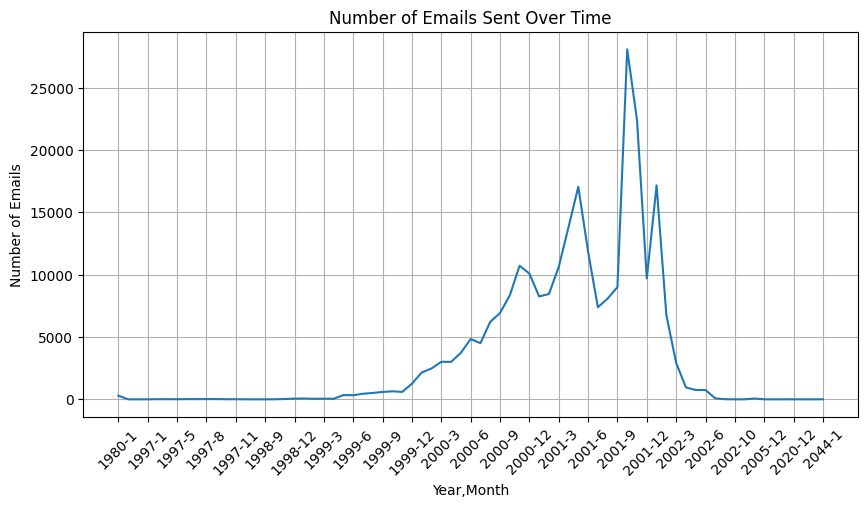

In [22]:
# Create large plot size
plt.figure(figsize=(10, 5))
emails_per_month_year.plot()
# Add tick marks in the x axis for every 3 months
plt.xticks(np.arange(0, len(emails_per_month_year), step=3), rotation=45,
           labels=[f"{year}-{month}" for year, month in emails_per_month_year.index][::3])
plt.ylabel('Number of Emails')
plt.title('Number of Emails Sent Over Time')
plt.grid()
plt.show()

In [23]:
import ssl
import certifi
ssl._create_default_https_context = ssl._create_unverified_context

# Download necessary datasets
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize the lemmatizer
wn = WordNetLemmatizer()

# Function to map NLTK's POS tags to WordNet POS tags
def get_wordnet_pos(word):
    """Get POS tag for lemmatization from NLTK's tag"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,  # Adjective
                "N": wordnet.NOUN, # Noun
                "V": wordnet.VERB, # Verb
                "R": wordnet.ADV}  # Adverb
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if the tag is not found


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\halim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\halim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [24]:
# Define function for cleaning and preprocessing the emails
def clean_the_mails(text):
    # Convert all the text to lowercase
    text = text.lower()
    
    # Remove all the special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text into words
    tokens = text.split()
    
    # Apply POS tagging and lemmatize each word
    tokens = [wn.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    
    # Rejoin the tokens into a single string
    return tokens


In [25]:
# Example sentence to clean and lemmatize
example_text = "This Lou pai loves strippers as side quest to helping Jeff Skiling."

# Clean and lemmatize the text
cleaned_text = clean_the_mails(example_text)

print("Original text:", example_text)
print("Cleaned and lemmatized text:", cleaned_text)


Original text: This Lou pai loves strippers as side quest to helping Jeff Skiling.
Cleaned and lemmatized text: ['this', 'lou', 'pai', 'love', 'stripper', 'a', 'side', 'quest', 'to', 'help', 'jeff', 'skiling']


In [26]:
# # Applying the clean mail function to the Body column and import to csv for future usage

# # Apply the clean_the_mails function to the 'Body' column of your email dataset
# enron_cleaned_emails_body_unique['Cleaned_Body'] = enron_cleaned_emails_body_unique['Body'].apply(clean_the_mails)

# # Save the DataFrame with the cleaned data to a CSV file for future use
# enron_cleaned_emails_body_unique.to_csv('enron_cleaned_emails_with_cleaned_body.csv', index=False)

# # Display the first few rows of the DataFrame to inspect the cleaned and lemmatized results
# enron_cleaned_emails_body_unique[['Body', 'Cleaned_Body']].head()

## Splitting into Different Time Frames

In [3]:
# Import the cleaned data from the CSV file
enron_corpus = pd.read_csv('../data/enron_cleaned_emails_with_cleaned_body.csv')

In [4]:
# Change enron corpus dataframe Date column to datetime object
enron_corpus['Date'] = pd.to_datetime(enron_corpus['Date'], errors='coerce', utc=True)

# Print dtypes of enron corpus dataframe
print(enron_corpus.dtypes)

From                         object
To                           object
Date            datetime64[ns, UTC]
Subject                      object
Body                         object
Year                          int64
Month                         int64
Cleaned_Body                 object
dtype: object


In [5]:
# Divide the enron_corpus into 3 dataframes

# The first dataframe for dates between June 1999 and August 2000 (Pre-crisis)
enron_pre_crisis = enron_corpus[(enron_corpus['Date'] >= '1999-06-01') & (enron_corpus['Date'] <= '2000-08-31')]

# The second dataframe for dates between Sep 2000 to Oct 2001 (During crisis)
enron_during_crisis = enron_corpus[(enron_corpus['Date'] >= '2000-09-01') & (enron_corpus['Date'] <= '2001-10-31')]

# The third dataframe for dates between November 2001 to June 2002 (Post-crisis)
enron_post_crisis = enron_corpus[(enron_corpus['Date'] >= '2001-11-01') & (enron_corpus['Date'] <= '2002-06-30')]

# Print the shape of each dataframe
print(enron_pre_crisis.shape)
print(enron_during_crisis.shape)
print(enron_post_crisis.shape)


(33981, 8)
(157792, 8)
(61382, 8)


# Q1 Topic Identification Across Time

Use LDA to find the most common topics across time under each of the pre-processed corpus under each period (pre, during, post crisis)

### Topic Modeling Based on Top Betweenness Senders, Under Each Pre-Defined Time Frame 

#### Pre-Crisis (June 1999 - August 2000 ) Email Corpus

- Using Gensim Stopwords

In [13]:
enron_pre_crisis_betweenness = pd.read_csv('Betweenness/enron_pre_crisis_betweenness.csv')

In [4]:
# Create custom filter for the tokenization
CUSTOM_FILTER = [lambda x: x.lower(), strip_punctuation, 
                 strip_multiple_whitespaces, strip_numeric,
                 strip_short, remove_stopwords]
# Tokenize the corpus using the custom filter defined above
# preprocess string is a function from gensim
precrisis_strings_tokenized = [preprocess_string(x, CUSTOM_FILTER) for x in enron_pre_crisis_betweenness['Body']]
# Create dictionary of the all_strings_tokenized using the corpora.Dictionary method   
dict = gensim.corpora.Dictionary(precrisis_strings_tokenized)
# Create a corpus bag of word from our tokenized strings
bow_corpus = [dict.doc2bow(text) for text in precrisis_strings_tokenized]

In [7]:
# Crate a LDA model with 5 topics
# num topics to indicate how many topics to generate
lda1 = gensim.models.LdaModel(corpus= bow_corpus, num_topics=5, id2word=dict)
reviews_vis_data = gensimvis.prepare(lda1, bow_corpus, dict)

In [8]:
# Print the lda model topics
pp = pprint.PrettyPrinter(indent=4, compact=True,)
pp.pprint(lda1.show_topics())

[   (   0,
        '0.101*"enron" + 0.016*"development" + 0.014*"subject" + 0.013*"sara" '
        '+ 0.011*"ect" + 0.010*"thanks" + 0.009*"know" + 0.008*"corp" + '
        '0.008*"mark" + 0.007*"let"'),
    (   1,
        '0.120*"ect" + 0.060*"hou" + 0.052*"enron" + 0.029*"ees" + '
        '0.016*"corp" + 0.012*"subject" + 0.009*"forwarded" + 0.007*"mark" + '
        '0.007*"david" + 0.007*"lon"'),
    (   2,
        '0.008*"power" + 0.008*"market" + 0.006*"energy" + 0.005*"price" + '
        '0.005*"california" + 0.005*"gas" + 0.005*"new" + 0.004*"company" + '
        '0.004*"enron" + 0.004*"business"'),
    (   3,
        '0.071*"com" + '
        '0.026*"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa" '
        '+ 0.013*"enron" + 0.011*"vince" + 0.010*"mail" + 0.009*"doc" + '
        '0.009*"subject" + 0.007*"message" + 0.007*"kaminski" + 0.004*"ect"'),
    (   4,
        '0.124*"ect" + 0.063*"hou" + 0.022*"enron" + 0.015*"subject" + '
        '0.012*"t

In [9]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(reviews_vis_data)

- After Additional Stopwords are Filtered Out

In [67]:
# Function to clean up and take out additional stop words
def clean(text):
    stop = set(stopwords.words('english'))
    stop.update(("to"
                 ,"cc"
                 ,"subject"
                 ,"http"
                 ,"from"
                 ,"sent"
                 ,"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"
                 ,'ee'
                 ,'com'
                 ,'e'
                 ,'www'
                 ,'com'
                 ,'asp'
                 ,'hotmail'
                 ,'net'
                 ,'would'
                 ,'enron'
                 ,'pm'
                 ,'message'
                ,'please'
                ,'ect'
                ,'hou'
                ,'know'
                ,'font'
                ,'td'
                ,'tr'
                ,'p'
                ,'b'
                ,'click'
                ,'corp'
                 ,'time'
                ,"mail" 
                ,"u"
                ,"na"
                ,"forwarded",
                'october',
                'thanks',
                'mailto',
                'monday',
                'let',
                'get',
                'image',
                'one',
                'said',
                'year',
                'need',
                'u',
                'x',
                'said',
                'type',
                'id',
                'date',
                'sc',
                'hour',
                'br',
                'align',
                'right',
                'class',
                'width',
                'href',
                'face',
                'november',
                'size',
                'pt',
                'arial',
                'week',
                'html'
                ,'helvetica'
                ,'may'
                ,'enronxgate'
                 ))
 
    exclude = set(string.punctuation) 
    # lemma = WordNetLemmatizer()
    # porter = PorterStemmer()
    
    text = text.rstrip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    # preprocessed_strings_tokenized = preprocess_string(punc_free)
    # normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    # stem = " ".join(porter.stem(token) for token in normalized.split())
    
    return punc_free

# function to get the topic
def get_topic(email_df, num_topics=5):
    
    text_clean=[]

    for text in email_df['Body']:
        text_clean.append(clean(text).split())

    # define dictionary and bag of words (text_term_matrix)
    dictionary = gensim.corpora.Dictionary(text_clean)
    text_term_matrix = [dictionary.doc2bow(text) for text in text_clean]

    # create LDA model and store the result in review_vis_data
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(text_term_matrix, num_topics=num_topics, id2word = dictionary, passes=20)
    review_vis_data = gensimvis.prepare(ldamodel, text_term_matrix, dictionary)

    # Print the lda model topics
    pp = pprint.PrettyPrinter(indent=4, compact=True)
    print("LDA Model Topics")
    pp.pprint(ldamodel.show_topics())

    # # joining back of words not in the stop words list
    # eng_stopwords = set(stopwords.words('english'))
    # def clean_text(text):
    #     #text = BeautifulSoup(text, 'html.parser').get_text()
    #     text = re.sub(r'[^a-zA-Z]', ' ', text)
    #     words = text.lower().split()
    #     words = [w for w in words if w not in eng_stopwords]
    #     return ' '.join(words)

    # # append the cleaned text back into the original email data frame
    # email_df["clean_content"] = email_df.Body.apply(clean_text)

    # # Create a word vectorizer and obtain the features in the email data frame
    # wordvector = TfidfVectorizer(analyzer='word', stop_words='english', max_df=0.4, min_df=5)
    # wordvector_fit = wordvector.fit_transform(email_df.clean_content)
    # feature = wordvector.get_feature_names_out()

    # # create clusters using KMeans
    # N = num_topics
    # clf = KMeans(n_clusters=N, 
    #             max_iter=50, 
    #             init='k-means++', 
    #             n_init=1)
    # labels = clf.fit_predict(wordvector_fit)

    # # create PCA model from the word vector
    # wordvector_fit_2d = wordvector_fit.todense()
    # pca = PCA(n_components=2).fit(np.asarray(wordvector_fit_2d))
    # datapoint = pca.transform(np.asarray(wordvector_fit_2d))

    return ldamodel, review_vis_data #, datapoint, labels, clf, pca, feature


In [68]:
# after revision in clean function
pre_crisis_ldamodel, pre_crisis_review_data = get_topic(enron_pre_crisis_betweenness, num_topics=5)

LDA Model Topics
[   (   0,
        '0.013*"ees" + 0.012*"vince" + 0.009*"j" + 0.007*"kaminski" + '
        '0.006*"meeting" + 0.004*"risk" + 0.004*"energy" + 0.004*"business" + '
        '0.004*"market" + 0.004*"group"'),
    (   1,
        '0.006*"gas" + 0.005*"deal" + 0.004*"day" + 0.004*"us" + 0.004*"et" + '
        '0.004*"new" + 0.003*"also" + 0.003*"mark" + 0.003*"see" + '
        '0.003*"like"'),
    (   2,
        '0.021*"doc" + 0.011*"c" + 0.011*"agreement" + 0.010*"attached" + '
        '0.007*"l" + 0.006*"wpd" + 0.006*"us" + 0.006*"ca" + 0.005*"intended" '
        '+ 0.005*"file"'),
    (   3,
        '0.009*"power" + 0.007*"f" + 0.006*"california" + 0.006*"fx" + '
        '0.006*"market" + 0.005*"prices" + 0.005*"aw" + 0.004*"way" + '
        '0.004*"state" + 0.004*"electricity"'),
    (   4,
        '0.015*"development" + 0.013*"sara" + 0.012*"tana" + 0.010*"mark" + '
        '0.010*"jones" + 0.010*"credit" + 0.008*"agreement" + 0.008*"david" + '
        '0.008*"isda" + 0

In [69]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(pre_crisis_review_data)

### During-Crisis Enron (Sep 2000 - Oct 2001) Email Corpus

In [4]:
enron_during_crisis_betweenness = pd.read_csv('Betweenness/enron_during_crisis_betweenness.csv')

In [5]:
enron_during_crisis_betweenness.head()

,Unnamed: 0,From,To,Date,Subject,Body,Year,Month,year-month,From_Source,To_Source,Receiver_Count,Community
0,0,steven.kean@enron.com,['gavin.dillingham@enron.com'],2000-09-01 07:16:00+00:00,California,Please send the economist piece around.\n-----...,2000,9,2000-09,internal,internal,1,4.0
1,1,steven.kean@enron.com,['mark.schroeder@enron.com'],2000-09-01 07:16:00+00:00,Re: 2001 budget,I do support the change. Let me know what I c...,2000,9,2000-09,internal,internal,1,4.0
2,2,steven.kean@enron.com,"[""nicholas.o'day@enron.com""]",2000-09-01 07:17:00+00:00,Re: Ken Lay/ Jeff Skilling visits,"No, I had the right date from our previous com...",2000,9,2000-09,internal,internal,1,4.0
3,3,vince.kaminski@enron.com,['vkaminski@aol.com'],2000-09-01 07:24:00+00:00,The rumor mill,---------------------- Forwarded by Vince J Ka...,2000,9,2000-09,internal,external,1,1.0
4,4,steven.kean@enron.com,"['tim.belden@enron.com', 'susan.mara@enron.com...",2000-09-01 07:43:00+00:00,NaN,When we have described the problems and soluti...,2000,9,2000-09,internal,internal,5,4.0


In [11]:
# preprocess string is a function from gensim
duringcrisis_strings_tokenized = [preprocess_string(x, CUSTOM_FILTER) for x in enron_during_crisis_betweenness['Body']]
# Create dictionary of the all_strings_tokenized using the corpora.Dictionary method   
dict = gensim.corpora.Dictionary(duringcrisis_strings_tokenized)
# Create a corpus bag of word from our tokenized strings
bow_corpus = [dict.doc2bow(text) for text in duringcrisis_strings_tokenized]

In [12]:
# Crate a LDA model with 5 topics
# num topics to indicate how many topics to generate
lda1 = gensim.models.LdaModel(corpus= bow_corpus, num_topics=5, id2word=dict)
reviews_vis_data = gensimvis.prepare(lda1, bow_corpus, dict)

In [13]:
# Print the lda model topics
pp = pprint.PrettyPrinter(indent=4, compact=True,)
pp.pprint(lda1.show_topics())

[   (   0,
        '0.058*"enron" + 0.018*"subject" + 0.016*"jeff" + 0.013*"sent" + '
        '0.013*"message" + 0.012*"original" + 0.011*"ees" + 0.010*"com" + '
        '0.009*"dasovich" + 0.007*"thanks"'),
    (   1,
        '0.009*"enron" + 0.009*"sent" + 0.009*"message" + 0.008*"original" + '
        '0.007*"subject" + 0.006*"october" + 0.005*"new" + 0.005*"information" '
        '+ 0.005*"louise" + 0.004*"thanks"'),
    (   2,
        '0.015*"power" + 0.013*"said" + 0.011*"state" + 0.011*"california" + '
        '0.011*"energy" + 0.006*"market" + 0.006*"gas" + 0.005*"electricity" + '
        '0.005*"davis" + 0.005*"price"'),
    (   3,
        '0.065*"ect" + 0.062*"enron" + 0.035*"hou" + 0.023*"enronxgate" + '
        '0.012*"subject" + 0.010*"eol" + 0.010*"tana" + 0.008*"jones" + '
        '0.008*"corp" + 0.008*"stephanie"'),
    (   4,
        '0.122*"com" + 0.038*"mail" + 0.011*"mailto" + 0.010*"recipient" + '
        '0.010*"intended" + 0.009*"enron" + 0.008*"message" + 0.007*

In [14]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(reviews_vis_data)

- After Additional Stopwords are Filtered Out

In [70]:
during_crisis_ldamodel, during_crisis_review_data = get_topic(enron_during_crisis_betweenness, num_topics=5)

LDA Model Topics
[   (   0,
        '0.011*"mark" + 0.010*"tana" + 0.010*"jones" + 0.010*"john" + '
        '0.008*"communications" + 0.007*"original" + 0.007*"j" + 0.007*"vince" '
        '+ 0.006*"david" + 0.005*"lon"'),
    (   1,
        '0.019*"ees" + 0.017*"jeff" + 0.010*"dasovich" + 0.010*"original" + '
        '0.006*"richard" + 0.006*"call" + 0.006*"james" + 0.005*"susan" + '
        '0.005*"meeting" + 0.005*"ferc"'),
    (   2,
        '0.005*"new" + 0.005*"original" + 0.004*"like" + 0.004*"information" + '
        '0.004*"business" + 0.004*"also" + 0.003*"us" + 0.003*"group" + '
        '0.003*"trading" + 0.003*"meeting"'),
    (   3,
        '0.017*"power" + 0.013*"state" + 0.013*"energy" + 0.012*"california" + '
        '0.006*"electricity" + 0.006*"market" + 0.006*"gas" + 0.006*"davis" + '
        '0.005*"price" + 0.005*"prices"'),
    (   4,
        '0.017*"ca" + 0.012*"term" + 0.012*"us" + 0.012*"gov" + 0.012*"epmi" + '
        '0.011*"org" + 0.009*"total" + 0.008*"sell

In [71]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(during_crisis_review_data)

### Post-Crisis Enron (Nov 2001 - June 2002) Email Corpus

In [21]:
enron_post_crisis_betweenness = pd.read_csv('Betweenness/enron_post_crisis_betweenness.csv')

In [16]:
# preprocess string is a function from gensim
postcrisis_strings_tokenized = [preprocess_string(x, CUSTOM_FILTER) for x in enron_post_crisis_betweenness['Body']]
# Create dictionary of the all_strings_tokenized using the corpora.Dictionary method   
dict = gensim.corpora.Dictionary(postcrisis_strings_tokenized)
# Create a corpus bag of word from our tokenized strings
bow_corpus = [dict.doc2bow(text) for text in postcrisis_strings_tokenized]

In [17]:
# Crate a LDA model with 5 topics
# num topics to indicate how many topics to generate
lda1 = gensim.models.LdaModel(corpus= bow_corpus, num_topics=5, id2word=dict)
reviews_vis_data = gensimvis.prepare(lda1, bow_corpus, dict)

In [18]:
# Print the lda model topics
pp = pprint.PrettyPrinter(indent=4, compact=True,)
pp.pprint(lda1.show_topics())

[   (   0,
        '0.078*"com" + 0.021*"enron" + 0.020*"www" + 0.014*"http" + '
        '0.013*"mail" + 0.010*"message" + 0.010*"sent" + 0.010*"subject" + '
        '0.008*"original" + 0.008*"dynegy"'),
    (   1,
        '0.020*"dec" + 0.018*"active" + 0.014*"prc" + 0.012*"position" + '
        '0.011*"january" + 0.009*"gas" + 0.008*"subject" + 0.008*"kam" + '
        '0.008*"original" + 0.008*"power"'),
    (   2,
        '0.011*"gas" + 0.008*"march" + 0.007*"peak" + 0.007*"power" + '
        '0.006*"change" + 0.006*"february" + 0.006*"january" + 0.006*"market" '
        '+ 0.005*"prices" + 0.005*"temperatures"'),
    (   3,
        '0.020*"enron" + 0.018*"http" + 0.011*"ubs" + 0.009*"gif" + '
        '0.008*"com" + 0.008*"images" + 0.008*"energy" + 0.007*"new" + '
        '0.006*"company" + 0.006*"said"'),
    (   4,
        '0.019*"sent" + 0.019*"message" + 0.016*"original" + 0.016*"subject" + '
        '0.010*"thanks" + 0.009*"enron" + 0.007*"know" + 0.007*"need" + '
        '0.0

In [19]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(reviews_vis_data)

- After Additional Stopwords are Filtered Out

In [72]:
post_crisis_ldamodel, post_crisis_review_data = get_topic(enron_post_crisis_betweenness, num_topics=5)

LDA Model Topics
[   (   0,
        '0.013*"active" + 0.013*"dec" + 0.012*"original" + 0.011*"prc" + '
        '0.010*"january" + 0.009*"position" + 0.007*"stacey" + 0.007*"power" + '
        '0.007*"john" + 0.007*"kam"'),
    (   1,
        '0.012*"power" + 0.012*"gas" + 0.011*"mwh" + 0.010*"market" + '
        '0.009*"peak" + 0.008*"request" + 0.008*"prices" + 0.007*"mw" + '
        '0.007*"energy" + 0.007*"roving"'),
    (   2,
        '0.013*"original" + 0.011*"ubs" + 0.008*"louise" + 0.007*"david" + '
        '0.006*"information" + 0.005*"kitchen" + 0.005*"fax" + 0.005*"mark" + '
        '0.005*"agreement" + 0.005*"intended"'),
    (   3,
        '0.008*"company" + 0.006*"new" + 0.005*"energy" + 0.005*"images" + '
        '0.005*"rigzone" + 0.004*"gif" + 0.004*"trading" + 0.004*"business" + '
        '0.004*"dynegy" + 0.003*"mr"'),
    (   4,
        '0.015*"original" + 0.007*"shelley" + 0.007*"kevin" + 0.006*"meeting" '
        '+ 0.005*"blackberry" + 0.005*"james" + 0.005*"corma

In [73]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(post_crisis_review_data)

### Filtering Based on Emails From/To External Parties and Within Enron 

#### Within Enron (Sending email to more than 5 recipients)

In [26]:
# import csv for withinenron_large_pre/during/crisis
we_l_pre = pd.read_csv('Betweenness/enron_pre_crisis__WithinEnron_Large_Betweenness.csv')
we_l_during = pd.read_csv('Betweenness/enron_during_crisis_WithinEnron_Large_Betweenness.csv')
we_l_post = pd.read_csv('Betweenness/enron_post_crisis_WithinEnron_Large_Betweenness.csv')

Pre-Crisis

In [74]:
we_l_pre_ldamodel, we_l_pre_review_data = get_topic(we_l_pre, num_topics=5)

LDA Model Topics
[   (   0,
        '0.027*"sara" + 0.025*"development" + 0.020*"agreement" + '
        '0.015*"shackleton" + 0.014*"isda" + 0.011*"master" + 0.009*"carol" + '
        '0.008*"susan" + 0.007*"ena" + 0.006*"credit"'),
    (   1,
        '0.023*"tana" + 0.019*"lon" + 0.019*"mark" + 0.018*"jones" + '
        '0.012*"taylor" + 0.011*"david" + 0.010*"eol" + 0.009*"credit" + '
        '0.007*"legal" + 0.007*"attached"'),
    (   2,
        '0.007*"doc" + 0.006*"meeting" + 0.006*"way" + 0.005*"sally" + '
        '0.005*"mark" + 0.005*"david" + 0.005*"delainey" + 0.004*"attached" + '
        '0.004*"ees" + 0.004*"call"'),
    (   3,
        '0.009*"f" + 0.008*"fx" + 0.007*"price" + 0.006*"aw" + 0.005*"day" + '
        '0.005*"l" + 0.004*"j" + 0.004*"dale" + 0.004*"aaaaaaaaaaaaaaaa" + '
        '0.004*"w"'),
    (   4,
        '0.007*"trading" + 0.007*"company" + 0.005*"us" + 0.005*"power" + '
        '0.005*"business" + 0.004*"gas" + 0.004*"transactions" + 0.004*"new" + '
     

In [75]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(we_l_pre_review_data)

During-Crisis

In [76]:
we_l_during_ldamodel, we_l_during_review_data = get_topic(we_l_during, num_topics=5)

LDA Model Topics
[   (   0,
        '0.015*"power" + 0.011*"state" + 0.011*"energy" + 0.010*"california" + '
        '0.006*"market" + 0.005*"gas" + 0.005*"electricity" + 0.005*"davis" + '
        '0.004*"company" + 0.004*"price"'),
    (   1,
        '0.010*"agreement" + 0.009*"tana" + 0.008*"term" + 0.008*"jones" + '
        '0.007*"epmi" + 0.006*"us" + 0.006*"mark" + 0.006*"credit" + '
        '0.006*"energy" + 0.006*"product"'),
    (   2,
        '0.009*"ca" + 0.008*"intended" + 0.007*"recipient" + '
        '0.006*"information" + 0.006*"cpuc" + 0.006*"contract" + '
        '0.006*"schwab" + 0.005*"email" + 0.005*"org" + 0.005*"use"'),
    (   3,
        '0.011*"jeff" + 0.010*"ees" + 0.010*"original" + 0.006*"meeting" + '
        '0.006*"dasovich" + 0.005*"call" + 0.004*"like" + 0.004*"john" + '
        '0.004*"james" + 0.004*"best"'),
    (   4,
        '0.012*"lynn" + 0.010*"original" + 0.008*"communications" + '
        '0.007*"blair" + 0.006*"john" + 0.006*"et" + 0.005*"mark" 

In [77]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(we_l_during_review_data)

Post-Crisis

In [33]:
we_l_post_ldamodel, we_l_post_review_data = get_topic(we_l_post, num_topics=5)

In [35]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(we_l_post_review_data)

#### Within Enron (Sending email to less than or equal to 5 recipients)

In [36]:
# import csv for withinenron_small_pre/during/crisis
we_s_pre = pd.read_csv('Betweenness/enron_pre_crisis__WithinEnron_Small_Betweenness.csv')
we_s_during = pd.read_csv('Betweenness/enron_during_crisis_WithinEnron_Small_Betweenness.csv')
we_s_post = pd.read_csv('Betweenness/enron_post_crisis_WithinEnron_Small_Betweenness.csv')

Pre-Crisis

In [37]:
we_s_pre_ldamodel, we_s_pre_review_data = get_topic(we_s_pre, num_topics=5)

In [39]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(we_s_pre_review_data)

During-Crisis

In [40]:
we_s_during_ldamodel, we_s_during_review_data = get_topic(we_s_during, num_topics=5)

In [42]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(we_s_during_review_data)

Post-Crisis

In [43]:
we_s_post_ldamodel, we_s_post_review_data = get_topic(we_s_post, num_topics=5)

In [45]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(we_s_post_review_data)

#### Emails From External Parties (With more than 5 recipients)

In [46]:
# import csv for fromexternal_large_pre/during/crisis
fe_l_pre = pd.read_csv('Betweenness/enron_pre_crisis__FromExt_Large_Betweenness.csv')
fe_l_during = pd.read_csv('Betweenness/enron_during_crisis_FromExt_Large_Betweenness.csv')
fe_l_post = pd.read_csv('Betweenness/enron_post_crisis_FromExt_Large_Betweenness.csv')

Pre-Crisis

In [47]:
fe_l_pre_ldamodel, fe_l_pre_review_data = get_topic(fe_l_pre, num_topics=5)

In [49]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(fe_l_pre_review_data)

During-Crisis

In [50]:
fe_l_during_ldamodel, fe_l_during_review_data = get_topic(fe_l_during, num_topics=5)

In [52]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(fe_l_during_review_data)

Post-Crisis

In [53]:
fe_l_post_ldamodel, fe_l_post_review_data = get_topic(fe_l_post, num_topics=5)

In [55]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(fe_l_post_review_data)

#### Emails To External Parties (With more than 5 recipients)

In [ ]:
# import csv for toexternal_large_pre/during/crisis
te_l_pre = pd.read_csv('Betweenness/enron_pre_crisis__ToExt_Large_Betweenness.csv')
te_l_during = pd.read_csv('Betweenness/enron_during_crisis_ToExt_Large_Betweenness.csv')
te_l_post = pd.read_csv('Betweenness/enron_post_crisis_ToExt_Large_Betweenness.csv')

Pre-Crisis

In [ ]:
te_l_pre_ldamodel, te_l_pre_review_data = get_topic(te_l_pre, num_topics=5)

In [ ]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(te_l_pre_review_data)

During-Crisis

In [ ]:
te_l_during_ldamodel, te_l_during_review_data = get_topic(te_l_during, num_topics=5)

In [ ]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(te_l_during_review_data)

Post-Crisis

In [ ]:
te_l_post_ldamodel, te_l_post_review_data = get_topic(te_l_post, num_topics=5)

In [ ]:
# Display the topics visually using pyLDAvis
pyLDAvis.display(te_l_post_review_data)

Community Based

# Q2 ANALYSIS TESTING

In [1]:
# ! Create a text generation pipeline using the default model from huggingface
generator = pipeline("text-generation")

NameError: name 'pipeline' is not defined